In [1]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
import pandas as pd
import numpy as np
from numpy import random
from random import randrange
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
from pandas import Series
from random import seed
from random import random
from statsmodels.tsa.stattools import adfuller

import math

import matplotlib.pyplot as plt



In [3]:
from __future__ import print_function
import os
import sys
#os.chdir('C:/Users/murat.ozemre/Documents/MOZEMRE-OZEL/Doktora/2017 Tez/Veri Analizi/Ver 3 Tez Izleme Calısmaları/Auto Correlation')
#os.chdir('C:/Users/murat.ozemre/Documents/MOZEMRE-OZEL/Doktora/2017 Tez/Veri Analizi/Ver 3 Tez Izleme Calısmaları')

os.chdir('C:/Users/murat.ozemre/Desktop/Thesis_Project/Data_Sources_and_Preparation')

# X and Xhat reading and then  Autocorrelation

In [4]:
Product=841840
Exp_Country='CHN' # 'CHN'
Imp_Country='GBR'

if Exp_Country=='CHN':
    Currency='CNY'
    EXP0='TUR'   
elif Exp_Country=='TUR':
    Currency='TRY'
    EXP0='CHN'   

In [5]:
Data_Core1 = pd.ExcelFile('Data_{}_{}_{}.xlsx'.format(Exp_Country,Imp_Country,Product))
Y = Data_Core1.parse('Y', header=0,index_col=None, na_values=['NA'])['{}_{}_{}'.format(Exp_Country,Imp_Country,Product)]

X = Data_Core1.parse('X', header=0,index_col=None, na_values=['NA'])
Xhat = Data_Core1.parse('Xhat', header=0,index_col=None, na_values=['NA'])

In [6]:
#Mean Stationary testi için 2 ayrı setin Mean Farkı 
Z=Y
split = int(len(Z)/ 2)
Z1, Z2 = Z[0:split], Z[split:]
mean1, mean2 = Z1.mean(), Z2.mean()
var1, var2 = Z1.var(), Z2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=1020.542857, mean2=1640.661972
variance1=166401.816977, variance2=113037.426962


# Sample Noise Calculation 
# Calculate and plot a white noise series


In [7]:
from random import gauss
from random import seed
from pandas import Series
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.gofplots import qqplot


from statsmodels.tsa.stattools import adfuller
from random import randrange

count    1000.000000
mean       -0.013222
std         1.003685
min        -2.961214
25%        -0.684192
50%        -0.010934
75%         0.703915
max         2.737260
dtype: float64


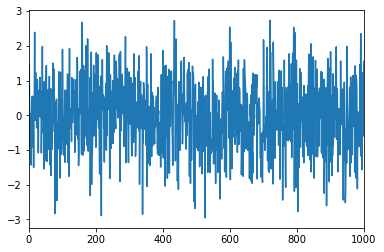

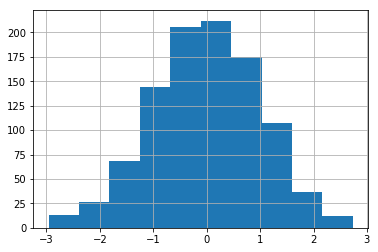

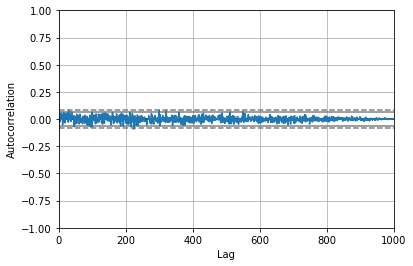

In [8]:
# seed random number generator
seed(1)
# create white noise series
series = [gauss(0.0, 1.0) for i in range(1000)]
series = Series(series)
# summary stats
print(series.describe())
# line plot
series.plot()
#pyplot.savefig("Deneme.png", format='png', dpi=300)

pyplot.show()

# histogram plot
series.hist()
pyplot.show()
# autocorrelation
autocorrelation_plot(series)
pyplot.show()

# End Sample White Noise Calculation

In [9]:
def Analiz(z,type_of_z):
   
    window_size=12
    
    rolling_mean = pd.rolling_mean(z, window=window_size)
    rolling_std = pd.rolling_std(z, window=window_size)
    
    z_diff = np.diff(z)
    z_diff = pd.Series(z_diff)
    
    rolling_mean_diff = pd.rolling_mean(z_diff, window=window_size)
    rolling_std_diff = pd.rolling_std(z_diff, window=window_size)

    
    pyplot.gcf().clear()
    
    fig = plt.figure(figsize=(14, 15))
    layout = (5, 2)
    
    line_plot=plt.subplot2grid(layout, (0, 0), colspan=2)
    line_plot_diff=plt.subplot2grid(layout, (1, 0), colspan=2)
    histogram_plot = plt.subplot2grid(layout, (2, 0))
    diff_histogram_plot = plt.subplot2grid(layout, (2, 1))
    

    
    autocorrelation_plot = plt.subplot2grid(layout, (3, 0))
    par_autocorrelation_plot = plt.subplot2grid(layout, (3, 1))
    
    qq_plot = plt.subplot2grid(layout, (4, 0))
    qq_plot_diff = plt.subplot2grid(layout, (4, 1))

    fig.suptitle('{} {} - Plots'.format(z.name, type_of_z), fontsize=24)


    z.plot(ax=line_plot, label='{}'.format(z.name))
    rolling_mean.plot(ax=line_plot, color='crimson', label='Rolling mean');
    rolling_std.plot(ax=line_plot, color='darkslateblue', label='Rolling std');
    line_plot.set_title(' Y - Line Plot')
    line_plot.legend()
   
    
    z_diff.plot(ax=line_plot_diff,label='{}-hat'.format(z.name))
    rolling_mean_diff.plot(ax=line_plot_diff, color='crimson',label='Rolling mean');
    rolling_std_diff.plot(ax=line_plot_diff, color='darkslateblue', label='Rolling std');
    line_plot_diff.set_title(' Differenced Y - Line Plot')
    line_plot_diff.legend()
    
    
    z.plot(ax=histogram_plot, kind='hist', bins=25)
    histogram_plot.set_title('Histogram Plot')
    
    z_diff.plot(ax=diff_histogram_plot, kind='hist', bins=25)
    diff_histogram_plot.set_title('Differenced Histogram Plot')
    
    plot_acf(z, ax=autocorrelation_plot,lags=30)
    pyplot.title('Auto Correlation with legs')
    
    plot_pacf(z,ax=par_autocorrelation_plot,lags=30)
    pyplot.title('Partial Auto Correlation with legs')

    
    qqplot(z, line='s', ax=qq_plot)
    qq_plot.set_title('QQ Plot')
    
    qqplot(z_diff, line='s', ax=qq_plot_diff)
    qq_plot_diff.set_title('QQ Plot Difference')

    
    pyplot.savefig('Plots_Autocorrelation\{} {} - Autocorrelation Plots.png'.format(z.name,type_of_z), format='png', dpi=300)
    pyplot.show()
    
    # perform Augmented Dickey Fuller test
    print('Results of Dickey-Fuller test:')
    dftest = adfuller(z, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['test statistic', 'p-value', '# of lags', '# of observations'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    
    return 

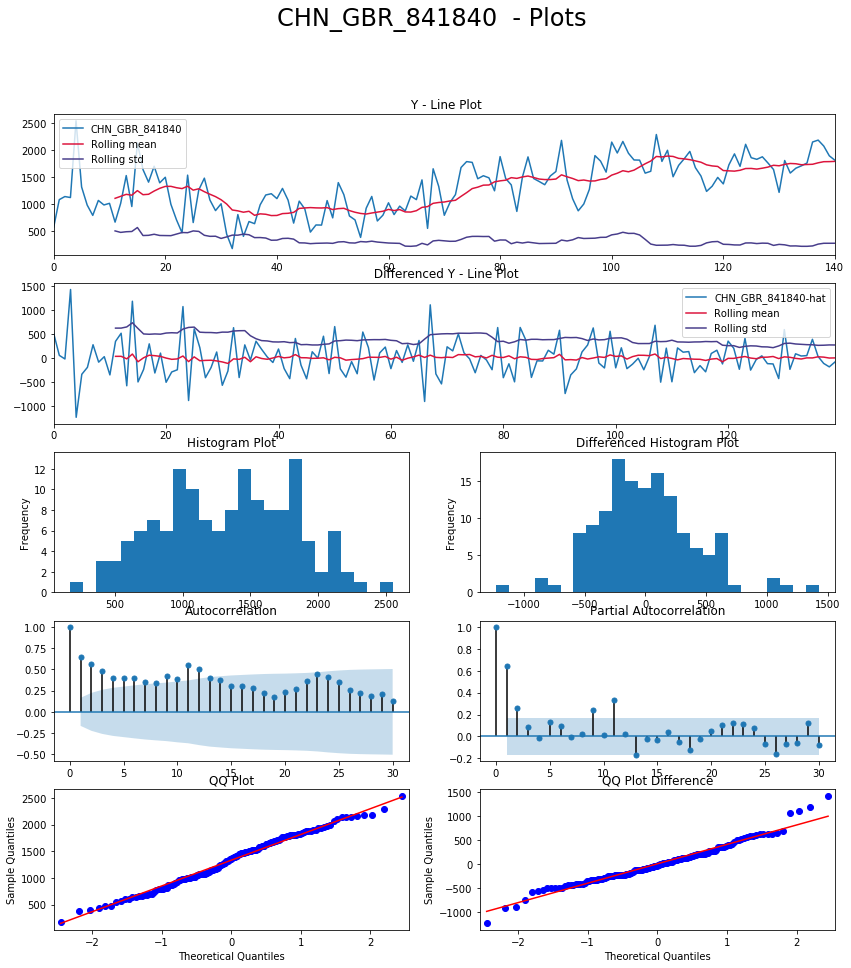

Results of Dickey-Fuller test:
test statistic           -0.738504
p-value                   0.836522
# of lags                12.000000
# of observations       128.000000
Critical Value (1%)      -3.482501
Critical Value (5%)      -2.884398
Critical Value (10%)     -2.578960
dtype: float64


In [10]:
# Analysis for Dependent Variable itself
dependent_variable=Y.dropna()
type_of_variable=''
Analiz(dependent_variable,type_of_variable)

# Analysis for any Independent Variable select column.
#Analiz(X.iloc[:, 12])


In [ ]:
# Analysis for Logarithm of Dependent Variable

log_of_dependent_variable=dependent_variable.apply(np.log)
type_of_variable='log'
Analiz(log_of_dependent_variable,type_of_variable)


In [ ]:
# Analysis for Logarithm of Dependent Variable

sqrt_of_dependent_variable=dependent_variable.apply(np.sqrt)
type_of_variable='sqrt'
Analiz(sqrt_of_dependent_variable,type_of_variable)


In [ ]:
def Get_Residual(z,model_for_residual):
    
    result = seasonal_decompose(z.tolist(), model=model_for_residual, freq=12)
#    result.plot()
#    pyplot.show()
#    observed=pd.Series(data=result.observed, index=z.index)
#    trend=pd.Series(data=result.trend, index=z.index)
#    seasonal=pd.Series(data=result.seasonal, index=z.index)
    resid=pd.Series(data=result.resid, index=z.index)
    resid=resid.dropna()
    
    window_size=12
    rolling_mean = pd.rolling_mean(resid, window=window_size)
    rolling_std = pd.rolling_std(resid, window=window_size)
    
    
    return resid,rolling_mean,rolling_std

In [ ]:
def Stationary_Analiz(z):
    a=''
    print(z.name)
    result = adfuller(z)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    series = [i+randrange(10) for i in range(1,100)]
    
    modeltype='additive'
    
    result = seasonal_decompose(z.tolist(), model=modeltype, freq=12)
    result.plot()
   
    pyplot.savefig("{}{} Decompose with {} moded .png".format(z.name,a,modeltype), format='png', dpi=300)

    pyplot.show()
    return

In [ ]:
def Stationary_Analiz_Short(z):
    #print(Product)
    result = adfuller(z)
    adf=int(100000*result[0])/100000
    p_value=int(100000*result[1])/100000

    #print('ADF Statistic: %f' % adf)
    #print('p-value: %f' % p_value)
    
    return adf,p_value

In [ ]:
    from matplotlib.backends.backend_pdf import PdfPages
    z=Y.dropna()   
    pp = PdfPages('Plots_Autocorrelation\{} - Residual Plots.pdf'.format(z.name))
    
    pyplot.gcf().clear()
    
  

    import matplotlib.pyplot as plt
    import numpy as np

    
    fig = plt.figure(figsize=(14, 22))
    layout = (6, 2)
  
    line_plot_00=plt.subplot2grid(layout, (0, 0), colspan=2)
    line_plot_01=plt.subplot2grid(layout, (1, 0), colspan=2)
    line_plot_10=plt.subplot2grid(layout, (2, 0), colspan=2)
    line_plot_11=plt.subplot2grid(layout, (3, 0), colspan=2)
    line_plot_20=plt.subplot2grid(layout, (4, 0), colspan=2)
    line_plot_21=plt.subplot2grid(layout, (5, 0), colspan=2)

#    For 2 Column Figures - 
#    layout = (3, 2) 
#    line_plot_00=plt.subplot2grid(layout, (0, 0), colspan=1)
#    line_plot_01=plt.subplot2grid(layout, (0, 1), colspan=1)
#    line_plot_10=plt.subplot2grid(layout, (1, 0), colspan=1)
#    line_plot_11=plt.subplot2grid(layout, (1, 1), colspan=1)
#    line_plot_20=plt.subplot2grid(layout, (2, 0), colspan=1)
#    line_plot_21=plt.subplot2grid(layout, (2, 1), colspan=1)
    
    # Additive  Model Residuals
   
    decomposition_model_type='additive'
    
    resid=Get_Residual(dependent_variable,decomposition_model_type)
    print(Stationary_Analiz_Short(resid[0]))
    dependent_variable_resid=resid[0]
    resid[0].plot(ax=line_plot_00, label='{}'.format(z.name))
    resid[1].plot(ax=line_plot_00, color='crimson',label='Rolling mean')
    resid[2].plot(ax=line_plot_00, color='darkslateblue', label='Rolling std')
    
    resid=Get_Residual(sqrt_of_dependent_variable,decomposition_model_type)
    print(Stationary_Analiz_Short(resid[0])) 
    sqrt_of_dependent_variable_resid=resid[0]
    resid[0].plot(ax=line_plot_10, label='{}'.format(z.name))
    resid[1].plot(ax=line_plot_10, color='crimson',label='Rolling mean')
    resid[2].plot(ax=line_plot_10, color='darkslateblue', label='Rolling std')
    
    
    resid=Get_Residual(log_of_dependent_variable,decomposition_model_type)
    print(Stationary_Analiz_Short(resid[0]))
    log_of_dependent_variable_resid=resid[0]
    resid[0].plot(ax=line_plot_20, label='{}'.format(z.name))
    resid[1].plot(ax=line_plot_20, color='crimson',label='Rolling mean')
    resid[2].plot(ax=line_plot_20, color='darkslateblue', label='Rolling std')
   
    # Multiplicative Model Residuals
    
    decomposition_model_type='multiplicative'
    resid=Get_Residual(dependent_variable,decomposition_model_type)
    print(Stationary_Analiz_Short(resid[0]))
    resid[0].plot(ax=line_plot_01, label='{}'.format(z.name))
    resid[1].plot(ax=line_plot_01, color='crimson',label='Rolling mean')
    resid[2].plot(ax=line_plot_01, color='darkslateblue', label='Rolling std')
    
    resid=Get_Residual(sqrt_of_dependent_variable,decomposition_model_type)
    print(Stationary_Analiz_Short(resid[0]))
    resid[0].plot(ax=line_plot_11, label='{}'.format(z.name))
    resid[1].plot(ax=line_plot_11, color='crimson',label='Rolling mean')
    resid[2].plot(ax=line_plot_11, color='darkslateblue', label='Rolling std')
    
    resid=Get_Residual(log_of_dependent_variable,decomposition_model_type)
    print(Stationary_Analiz_Short(resid[0]))
    resid[0].plot(ax=line_plot_21, label='{}'.format(z.name))
    resid[1].plot(ax=line_plot_21, color='crimson',label='Rolling mean')
    resid[2].plot(ax=line_plot_21, color='darkslateblue', label='Rolling std')
    
    line_plot_00.set_title('Additive Residual')
    line_plot_01.set_title('Additive SQRT Residual')
    line_plot_10.set_title('Additive LOG Residual')
    line_plot_11.set_title('Multiplicative Residual')
    line_plot_20.set_title('Multiplicative SQRT Residual')
    line_plot_21.set_title('Multiplicative LOG Residual')
    
    plt.savefig(pp, format='pdf')
    
    pyplot.show()

    pp.close()

In [ ]:
#ADF Test for each feature and write to excel sheet

X=X.dropna() 
Xhat=Xhat.dropna()

#   Herbir özellik için ADF Calısır

n_feature=X.shape[1]
result=[]
Stationary_result=np.zeros((4,X.shape[1]))

for i in range(n_feature):
        
        x=X.iloc[:, i]
        xhat=Xhat.iloc[:, i]
        title=list(X)[i:i+1]
       
        analiz_result_x=Stationary_Analiz_Short(x)
        analiz_result_xhat=Stationary_Analiz_Short(xhat)
        
        result.append(title)
        result.append(analiz_result_x)
        result.append(analiz_result_xhat)

result_array=np.asarray(result).reshape(n_feature,3)

result_array

df = pd.DataFrame(np.random.randn(n_feature,5),columns='Title A P Ahat Phat'.split())
#result=np.asarray(result).reshape(n_feature,3)  
for i in range(n_feature):   


        df.iloc[i, 0]=str(result[0+3*i])
        df.iloc[i, 1]=result[1+3*i][0]
        df.iloc[i, 2]=result[1+3*i][1]
        df.iloc[i, 3]=result[2+3*i][0]
        df.iloc[i, 4]=result[2+3*i][1]
df.to_excel('Stationary_Analiz_{}_{}_{}.xlsx'.format(Exp_Country,Imp_Country,Product),index = False)

In [ ]:
def ts_diagnostics(y, lags=None, title=''):
    '''
    Calculate acf, pacf, qq plot and Augmented Dickey Fuller test for a given time series
    '''
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    
    rolling_mean = pd.rolling_mean(y, window=24)
    rolling_std = pd.rolling_std(y, window=24)
    
    fig = plt.figure(figsize=(14, 12))
    layout = (3, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
    qq_ax = plt.subplot2grid(layout, (2, 0))
    hist_ax = plt.subplot2grid(layout, (2, 1))
    
    # time series plot
    y.plot(ax=ts_ax)
    rolling_mean.plot(ax=ts_ax, color='crimson');
    rolling_std.plot(ax=ts_ax, color='darkslateblue');
    plt.legend(loc='best')
    ts_ax.set_title(title, fontsize=24);
    
    # acf and pacf
    plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
    plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5) 
    
    # qq plot
    qqplot(y, line='s', ax=qq_ax)
    qq_ax.set_title('QQ Plot')
    
    # hist plot
    y.plot(ax=hist_ax, kind='hist', bins=25);
    hist_ax.set_title('Histogram');
    plt.tight_layout();
    plt.savefig("{}Auto Correlation Study .png".format(z.name), format='png', dpi=300)
    plt.show()
    
    # perform Augmented Dickey Fuller test
    print('Results of Dickey-Fuller test:')
    dftest = adfuller(y, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['test statistic', 'p-value', '# of lags', '# of observations'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    return



In [ ]:
#result = seasonal_decompose(y.tolist(), model='additive', freq=12)
#print(result.trend)
#print(result.seasonal)
#print(result.resid)
#print(result.observed)


In [ ]:
# ACF plot of time series
from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
#series = Series.from_csv('daily-minimum-temperatures.csv', header=0)
print(Product)
plot_acf(Y,lags=30)
pyplot.show()

# GRID ARIMA SEARCH

In [24]:
# grid search ARIMA parameters for a time series
import warnings
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE

def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        # model_fit = model.fit(disp=0)
        model_fit = model.fit(trend='nc', disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
        # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
#    r2=sqrt(r2_score(test, predictions)**2)
    r2=r2_score(test, predictions)
    
    return rmse,test,predictions

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score = float("inf")
    best_cfg = float("inf")
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    result = evaluate_arima_model(dataset, order)
                    rmse = result[0]
                    best_test=result[1]
                    best_prediction=result[2]
                    if rmse < best_score:
#                    if rmse > best_score:

                        best_score, best_cfg = rmse, order
                        r2=r2_score(best_test,best_prediction)
                        print('ARIMA%s RMSE=%.3f R2=%.3f' % (order,rmse,r2))
    
                        
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f R2=%.3f' % (best_cfg, best_score,r2))
    return best_test,best_prediction


In [ ]:
p_values = range(0, 12)
d_values = range(0, 3)
q_values = range(0, 12)

In [ ]:

series = sqrt_of_dependent_variable
warnings.filterwarnings("ignore")
a=evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 1) RMSE=60.931 R2=-17.521
ARIMA(0, 0, 2) RMSE=43.669 R2=-8.514
ARIMA(0, 0, 3) RMSE=31.108 R2=-3.828
ARIMA(0, 0, 5) RMSE=25.209 R2=-2.170
ARIMA(0, 0, 6) RMSE=21.230 R2=-1.248
ARIMA(0, 0, 9) RMSE=18.932 R2=-0.788
ARIMA(0, 0, 10) RMSE=18.697 R2=-0.744
ARIMA(0, 1, 1) RMSE=13.530 R2=0.087
ARIMA(0, 1, 3) RMSE=13.515 R2=0.089
ARIMA(0, 1, 4) RMSE=13.308 R2=0.116
ARIMA(3, 1, 1) RMSE=13.217 R2=0.129
ARIMA(5, 1, 5) RMSE=13.149 R2=0.137


In [ ]:
series = dependent_variable
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

In [ ]:
series = log_of_dependent_variable
warnings.filterwarnings("ignore")
a=evaluate_models(series.values, p_values, d_values, q_values)

In [ ]:
series = dependent_variable_resid
warnings.filterwarnings("ignore")
a=evaluate_models(series.values, p_values, d_values, q_values)

In [ ]:
series = log_of_dependent_variable_resid
warnings.filterwarnings("ignore")
a=evaluate_models(series.values, p_values, d_values, q_values)

In [ ]:
series = sqrt_of_dependent_variable_resid
warnings.filterwarnings("ignore")
a=evaluate_models(series.values, p_values, d_values, q_values)